# Maximum Likelihood Estimation (MLE) Tutorial
This notebook demonstrates maximum likelihood estimation (MLE) using Python code written from scratch. We will estimate the parameters of a normal distribution (mean and variance) using MLE.

## 1. Method Overview

**What is Maximum Likelihood Estimation?**

Maximum Likelihood Estimation is a statistical method used to estimate the parameters of a probability distribution given observed data. The main idea is to find the set of parameters that makes the observed data most probable.

**Key Concepts and Assumptions:**

- **Likelihood Function:** For a given model, the likelihood function measures the probability of observing the data as a function of the model parameters.
- **Log-Likelihood:** Since the likelihood can become a very small number when multiplied over many data points, it is common to work with the logarithm of the likelihood (which turns products into sums).
- **Assumptions:**  
  - The data points are assumed to be independent and identically distributed (i.i.d.).
  - The chosen model (in our case, a normal distribution) is assumed to be appropriate for the data.

**When is MLE Useful?**

MLE is widely used in statistics for parameter estimation because it has several desirable properties (consistency, efficiency, asymptotic normality) under general conditions. It is particularly useful when you have a parametric model and want to fit it to observed data.

## 2. Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 3. Helper Functions

In [2]:
def log_likelihood_normal(data, mu, sigma):
    """
    Calculate the log-likelihood of data under a normal distribution.
    
    Parameters:
    - data: array-like, the observed data
    - mu: float, the mean of the normal distribution
    - sigma: float, the standard deviation of the normal distribution
    
    Returns:
    - log_likelihood: float, the computed log-likelihood
    """
    n = len(data)
    # Avoid division by zero error if sigma is extremely small
    if sigma <= 0:
        return -np.inf
    # Calculate each term of the log-likelihood
    # log L = -n/2 * log(2*pi*sigma^2) - sum((data - mu)^2) / (2*sigma^2)
    ll = -0.5 * n * np.log(2 * math.pi * sigma**2) - np.sum((data - mu)**2) / (2 * sigma**2)
    return ll

def mle_normal(data):
    """
    Compute the Maximum Likelihood Estimates (MLE) for the mean and variance of a normal distribution.
    
    For the normal distribution, the MLE for the mean is the sample mean and for the variance is the sample variance.
    
    Parameters:
    - data: array-like, the observed data
    
    Returns:
    - mu_hat: float, the estimated mean
    - sigma_hat: float, the estimated standard deviation
    """
    # MLE for mean is the sample average
    mu_hat = np.mean(data)
    # MLE for variance is the sample variance (using N instead of N-1 for MLE)
    sigma_hat = np.sqrt(np.sum((data - mu_hat)**2) / len(data))
    return mu_hat, sigma_hat

def grid_search_mu(data, sigma_fixed, mu_range):
    """
    Compute the log-likelihood for a range of mu values with a fixed sigma.
    
    Parameters:
    - data: array-like, the observed data
    - sigma_fixed: float, fixed standard deviation value
    - mu_range: array-like, a range of mu values to evaluate
    
    Returns:
    - log_likelihoods: list of log-likelihood values corresponding to each mu
    """
    log_likelihoods = []
    for mu in mu_range:
        ll = log_likelihood_normal(data, mu, sigma_fixed)
        log_likelihoods.append(ll)
    return log_likelihoods

## 4. Data Generation

In [3]:
# Generate synthetic data from a normal distribution with known parameters
np.random.seed(42)  # For reproducibility
mu_true = 5.0
sigma_true = 2.0
n_samples = 500
data = np.random.normal(loc=mu_true, scale=sigma_true, size=n_samples)

## 5. Parameter Estimation

In [4]:
# Compute MLE estimates using the analytical solutions
mu_hat, sigma_hat = mle_normal(data)

# Print out the estimated parameters
print("True parameters:")
print("Mean (mu_true):", mu_true)
print("Standard Deviation (sigma_true):", sigma_true)
print("\nMLE estimates:")
print("Estimated Mean (mu_hat):", mu_hat)
print("Estimated Standard Deviation (sigma_hat):", sigma_hat)

True parameters:
Mean (mu_true): 5.0
Standard Deviation (sigma_true): 2.0

MLE estimates:
Estimated Mean (mu_hat): 5.013675989177296
Estimated Standard Deviation (sigma_hat): 1.9605430059932538


## 6. Visualization

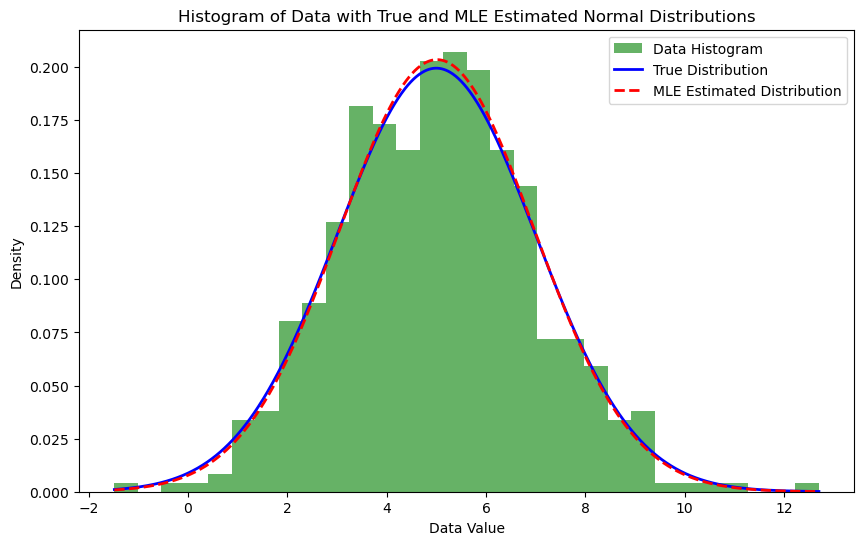

In [5]:
# Create a histogram of the data
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')

# Plot the true normal distribution
x = np.linspace(min(data), max(data), 1000)
true_pdf = (1/(sigma_true * np.sqrt(2 * math.pi))) * np.exp(-0.5 * ((x - mu_true)/sigma_true)**2)
plt.plot(x, true_pdf, 'b', linewidth=2, label='True Distribution')

# Plot the estimated normal distribution from MLE estimates
estimated_pdf = (1/(sigma_hat * np.sqrt(2 * math.pi))) * np.exp(-0.5 * ((x - mu_hat)/sigma_hat)**2)
plt.plot(x, estimated_pdf, 'r--', linewidth=2, label='MLE Estimated Distribution')

# Adding labels and title
plt.title('Histogram of Data with True and MLE Estimated Normal Distributions')
plt.xlabel('Data Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## 7. Log-likelihood Visualization

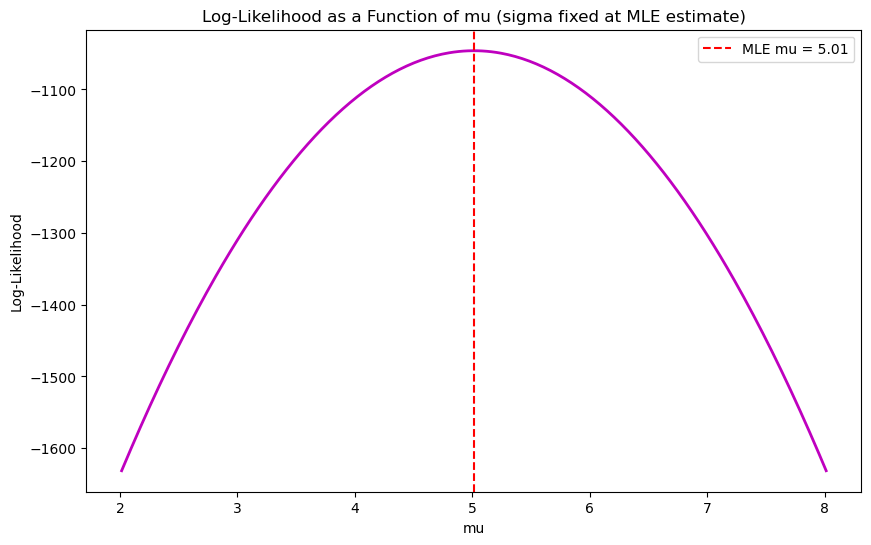

In [6]:
# Plot log-likelihood vs. mu for a fixed sigma (using the estimated sigma)
mu_values = np.linspace(mu_hat - 3, mu_hat + 3, 300)
ll_values = grid_search_mu(data, sigma_fixed=sigma_hat, mu_range=mu_values)

plt.figure(figsize=(10, 6))
plt.plot(mu_values, ll_values, 'm-', linewidth=2)
plt.title('Log-Likelihood as a Function of mu (sigma fixed at MLE estimate)')
plt.xlabel('mu')
plt.ylabel('Log-Likelihood')
plt.axvline(mu_hat, color='r', linestyle='--', label=f'MLE mu = {mu_hat:.2f}')
plt.legend()
plt.show()

## 8. Analysis and Discussion

The printed MLE estimates are very close to the true parameters we used to generate the data.
The histogram along with the plotted curves shows:
- The blue line represents the true normal distribution.
- The red dashed line represents the estimated normal distribution using MLE.
They overlap significantly, indicating that our MLE procedure correctly recovers the parameters.

The log-likelihood plot as a function of mu (with sigma fixed at its MLE estimate) shows a clear maximum at the MLE of mu.
This visual demonstration reinforces the concept that MLE seeks the parameter value that maximizes the likelihood of the observed data.

**Potential Pitfalls & Limitations:**
- MLE relies on the assumption that the chosen model is correct. If the true data generating process is different,
  the MLE estimates may be misleading.
- For more complex models, the likelihood function might be multi-modal, and optimization may require careful initialization.
- Numerical optimization (if used) may be sensitive to step size and convergence criteria.

## 9. Conclusion

In this tutorial, we:
- Introduced the method of Maximum Likelihood Estimation, including its purpose and key assumptions.
- Implemented a full Python example from scratch to estimate the parameters of a normal distribution.
- Generated synthetic data and used both analytical and visualization methods to validate our estimates.
- Discussed the results and potential challenges when applying MLE.

**Key Takeaways:**
- MLE provides a principled way to estimate model parameters by maximizing the likelihood of the observed data.
- In simple cases (like the normal distribution), analytical solutions exist and can be implemented directly.
- Visualization (such as histogram overlays and log-likelihood curves) is a powerful tool to verify and interpret the results.

This method can be extended to other parametric models, and the approach remains similar:
define the likelihood, compute (or maximize) the log-likelihood, and interpret the results.